In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import json

rows = []
with open("../reports/contam_filtering_v2.jsonl", "r") as f:
    for i, line in enumerate(f, start=1):
        try:
            rows.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Skipping line {i}: {e}")

df = pd.DataFrame(rows)


Skipping line 715: Expecting value: line 1 column 896403 (char 896402)


In [10]:
df = pd.read_json("../reports/contam_filtering_v2.jsonl", lines=True, orient="records")
df["preds"] = df["preds"].apply(np.array)
df["labels"] = df["labels"].apply(np.array)
df["is_anom"] = df["is_anom"].apply(np.array)

df["accuracy"] = df.apply(
    lambda row: (row["preds"] == row["labels"])[~row["is_anom"]].mean() * 100, axis=1
)

parameters = ["dataset", "anomaly_type", "p_anomaly", "mode", "threshold_type"]
dfm = df.groupby(parameters)["accuracy"].mean()

In [12]:
dfm.xs("Covertype", level=0)

anomaly_type  p_anomaly  mode                threshold_type
feature_swap  0.02       online              hard              91.858703
                                             linear            92.518073
                                             sigmoid           91.920669
                         pre-trained         hard              92.033506
                                             linear            91.836686
                                             no_filter         91.621812
                                             sigmoid           91.990012
                         pre-trained+online  hard              91.968904
                                             linear            90.508687
                                             sigmoid           91.965171
              0.04       online              hard              91.765426
                                             linear            91.509278
                                             sigmoid           9

In [35]:
df = pd.read_json(
    "../reports/contam_filtering_ctype.jsonl", lines=True, orient="records"
)
df["steepness"] = df["steepness"].fillna(np.inf)
df["preds"] = df["preds"].apply(np.array)
df["labels"] = df["labels"].apply(np.array)
df["loss_weights"] = df["loss_weights"].apply(np.array)
df["is_anom"] = df["is_anom"].apply(np.array)

df["accuracy"] = df.apply(
    lambda row: (row["preds"] == row["labels"])[~row["is_anom"]].mean() * 100, axis=1
)

parameters = ["dataset", "anomaly_type", "p_anomaly", "steepness", "threshold_quantile"]
dfm = df.groupby(parameters)["accuracy"].mean()

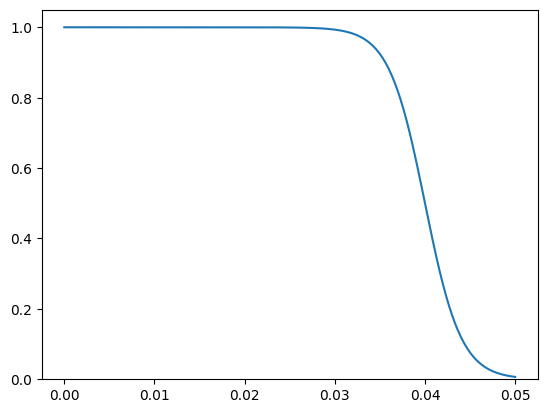

In [25]:
# Visualize soft threshold
threshold = .04
steepness = 20 / threshold
x = np.linspace(0, 0.05, 300)
y = 1 / (1 + np.exp(steepness * (x - threshold)))
fig, ax = plt.subplots()
ax.set_ylim(0, 1.05)
ax.plot(x, y)